HR Analytics

In [5]:
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df=pd.read_csv('general_data.csv',index_col=0)
df2=pd.read_csv('employee_survey.csv',index_col=0)
df3=pd.read_csv('manager_survey.csv',index_col=0)

In [7]:
## Datos vacios y/o en blanco 
df.fillna(0,inplace=True)
df2.fillna(0,inplace=True)
df3.fillna(0,inplace=True)

In [8]:
df1=pd.merge(df, df2, on='EmployeeID', how='outer')
total_data=pd.merge(df1, df3, on='EmployeeID', how='outer')
total_data

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4406,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,Female,1,...,10.0,5,3,0,2,4.0,1.0,3.0,3,3
4407,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,Male,1,...,10.0,2,3,0,2,4.0,4.0,3.0,2,3
4408,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,Male,2,...,5.0,4,4,1,2,1.0,3.0,3.0,3,4


In [9]:
#Eliminando columnas no necesarias 
total_data.drop(['Education', 'Over18', 'StandardHours', 'EmployeeCount'], axis='columns', inplace=True)

In [10]:
total_data.describe()

,Age,DistanceFromHome,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.063946,65029.312925,2.683220,15.209524,0.793878,11.256916,2.799320,7.008163,2.187755,4.123129,2.708163,2.715873,2.737642,2.729932,3.153741
std,9.133301,8.105026,1.106689,47068.888559,2.499737,3.659108,0.851883,7.790928,1.288978,6.125135,3.221699,3.567327,1.108679,1.113943,0.748091,0.711400,0.360742
min,18.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
25%,30.000000,2.000000,1.000000,29110.000000,1.000000,12.000000,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,36.000000,7.000000,2.000000,49190.000000,2.000000,14.000000,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,43.000000,14.000000,3.000000,83800.000000,4.000000,18.000000,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,60.000000,29.000000,5.000000,199990.000000,9.000000,25.000000,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


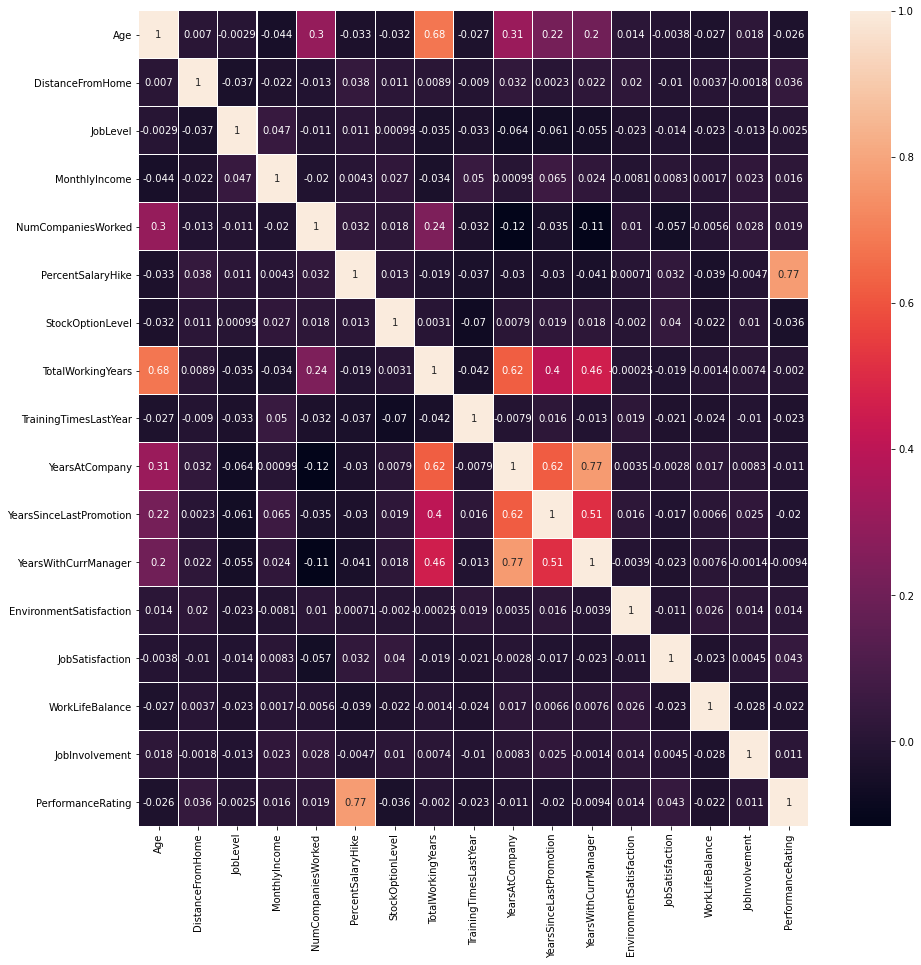

In [11]:
#Matriz de correlación
fig = plt.figure(figsize=(15, 15))
corr=total_data.corr()
sns.heatmap(corr,annot=True, linewidth=0.1)
plt.savefig("MatrizCorrelación.jpg")

Gender  Department            
Female  Research & Development    1164
        Sales                      528
        Human Resources             72
Male    Research & Development    1719
        Sales                      810
        Human Resources            117
Name: Department, dtype: int64

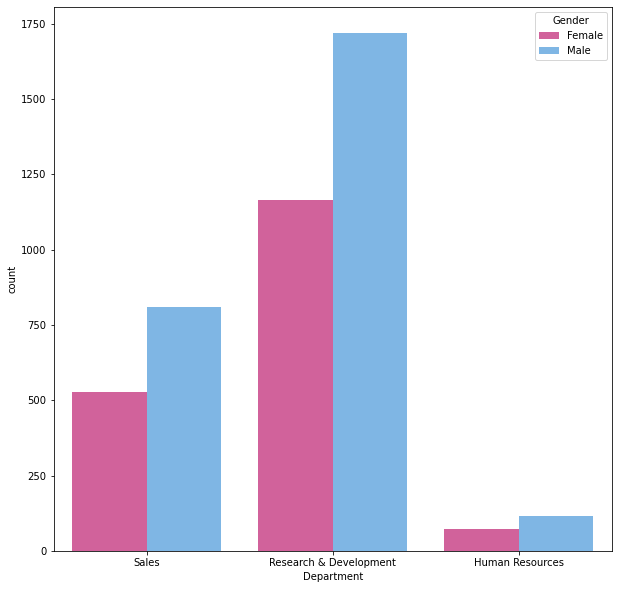

In [12]:
fig = plt.figure(figsize=(10, 10))
sns.countplot(x='Department', hue='Gender', data=total_data, palette=('#e44f9c','#6eb8f5'),linewidth=0.1)
plt.savefig("Age-Dep.jpg")
dei=df.groupby('Gender')['Department'].value_counts()
dei

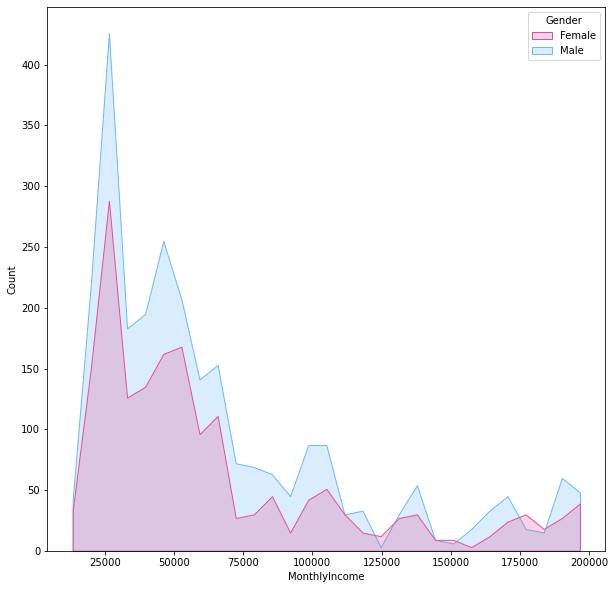

In [13]:
fig = plt.figure(figsize=(10, 10))
sns.histplot(x='MonthlyIncome', hue='Gender', data=total_data, element='poly', palette=('#e44f9c','#6eb8f5'))
plt.savefig("Age-Salary.jpg")

Gender  Department            
Female  Research & Development    1164
        Sales                      528
        Human Resources             72
Male    Research & Development    1719
        Sales                      810
        Human Resources            117
Name: Department, dtype: int64

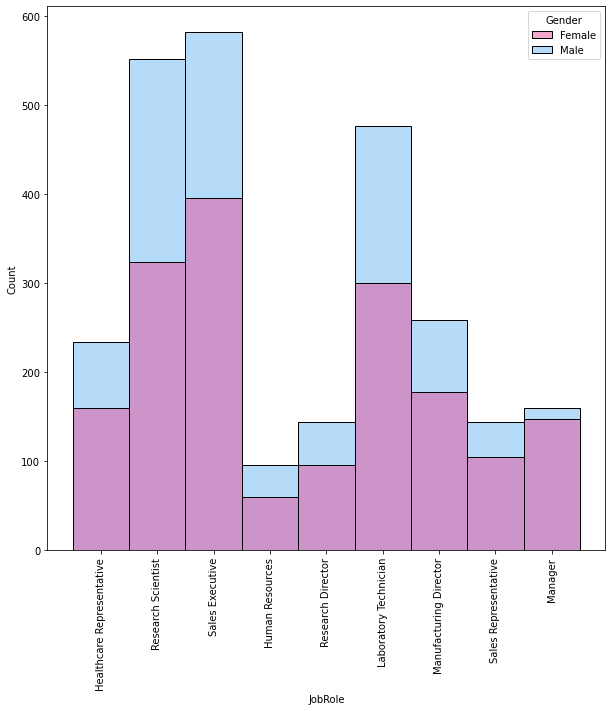

In [14]:
fig = plt.figure(figsize=(10, 10))
sns.histplot(x='JobRole', hue='Gender', data=total_data,palette=('#e44f9c','#6eb8f5'))
plt.xticks(rotation=90)
plt.savefig("Age-JobRole.jpg")
djr=df.groupby('Gender')['Department'].value_counts()
djr

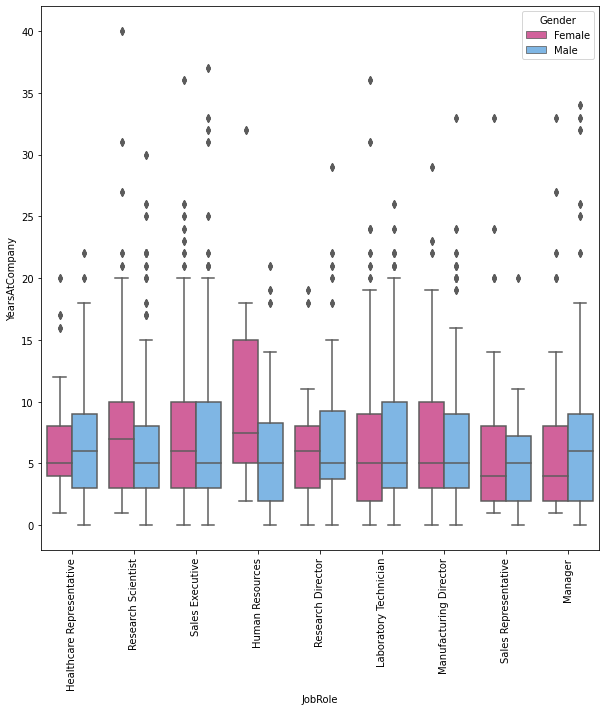

In [15]:
fig = plt.figure(figsize=(10, 10))
sns.boxplot(x='JobRole',y='YearsAtCompany', hue='Gender', data=total_data,palette=('#e44f9c','#6eb8f5'))
plt.xticks(rotation=90)
plt.savefig("Age-JobRole.jpg")

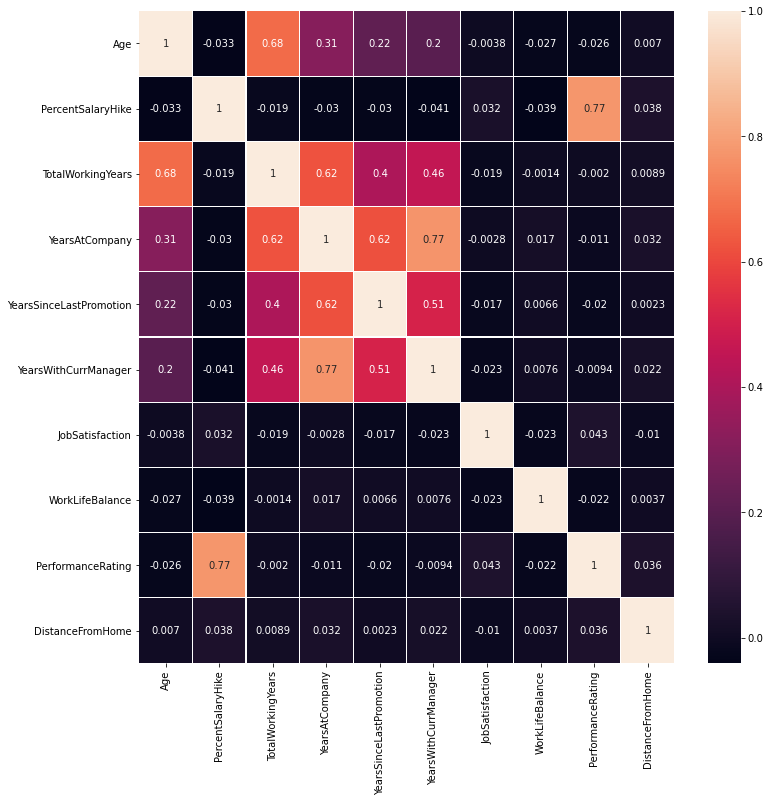

In [16]:
##Variables a considerar
mod=total_data[['Age','PercentSalaryHike','TotalWorkingYears', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
               'JobSatisfaction','WorkLifeBalance','PerformanceRating', 'DistanceFromHome']]
fig = plt.figure(figsize=(12, 12))
sns.heatmap(mod.corr(),annot=True, linewidth=0.1)
plt.savefig("mod-corr.jpg")

In [17]:
from sklearn import linear_model
from sklearn import model_selection 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [18]:
x=np.array(mod.drop(['WorkLifeBalance'], 1))
y=np.array(mod['WorkLifeBalance'])
x.shape

(4410, 9)

In [19]:
model = linear_model.LogisticRegression(max_iter=10000)
model.fit(x,y)

LogisticRegression(max_iter=10000)

In [20]:
predictions = model.predict(x)
print(predictions)

[3. 3. 3. ... 3. 3. 3.]


In [21]:
model.score(x,y)

0.6031746031746031

In [22]:
validation_size = 0.20
seed = 7
x_train, x_validation, y_train, y_validation = model_selection.train_test_split(x, y, test_size=validation_size, random_state=seed)

In [23]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())

C:\Users\sarah\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [24]:
predictions = model.predict(x_validation)
print(accuracy_score(y_validation, predictions))

0.6292517006802721


In [25]:
print(confusion_matrix(y_validation, predictions))

[[  0   0   0   9   0]
 [  0   0   0  42   0]
 [  0   0   0 206   0]
 [  0   0   0 555   0]
 [  0   0   0  70   0]]


In [26]:
print(classification_report(y_validation, predictions))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         9
         1.0       0.00      0.00      0.00        42
         2.0       0.00      0.00      0.00       206
         3.0       0.63      1.00      0.77       555
         4.0       0.00      0.00      0.00        70

    accuracy                           0.63       882
   macro avg       0.13      0.20      0.15       882
weighted avg       0.40      0.63      0.49       882



C:\Users\sarah\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
